In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from math import sqrt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [19]:
f = open('bank-names.txt', 'r')

listic = []
for i in f.read():
    listic.append(i)
    
data_full = pd.read_csv("bank-full.csv", ';')


In [20]:
df = pd.DataFrame(data_full)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
df.shape

(45211, 17)

In [25]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [27]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [28]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [29]:
for feature in categorical_features:
    print('The feature  {} and number {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


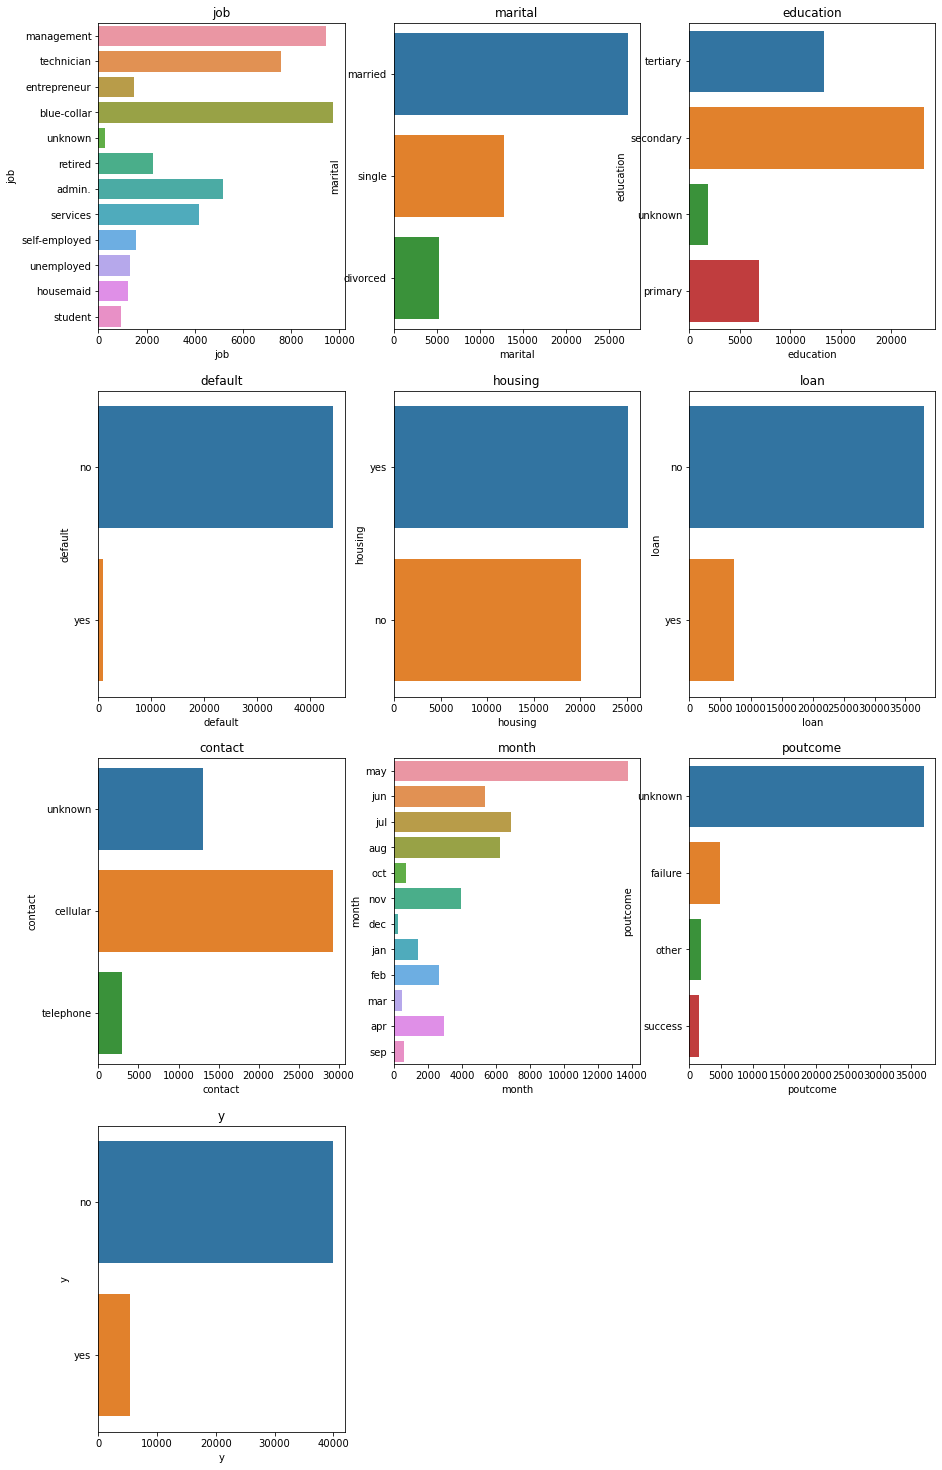

In [30]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

ValueError: Could not interpret input 'deposit'

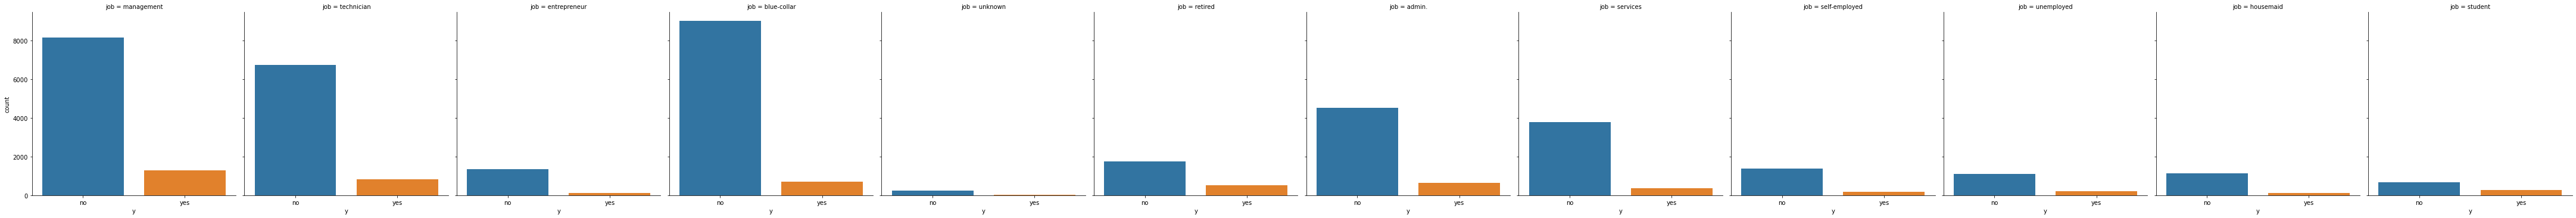

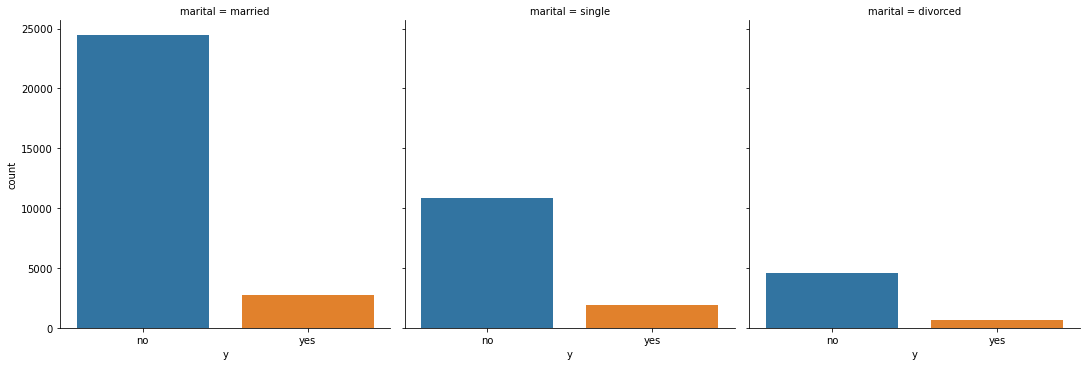

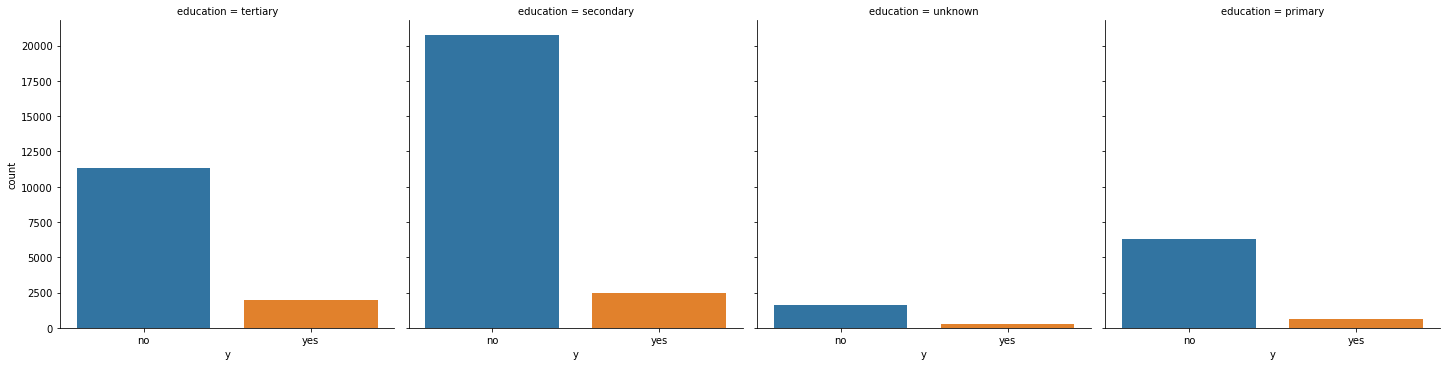

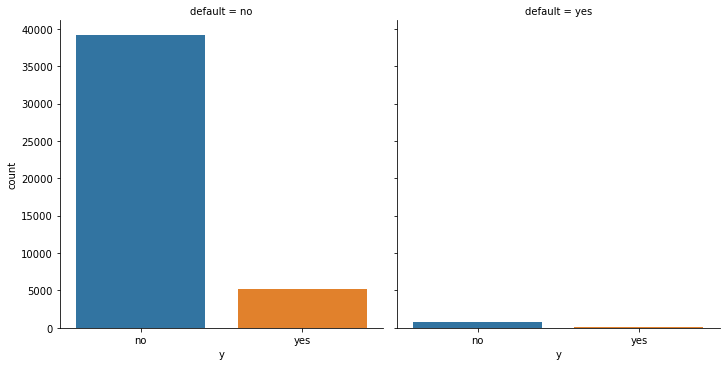

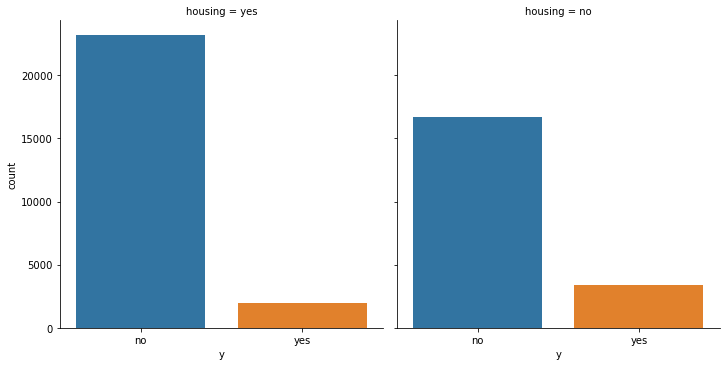

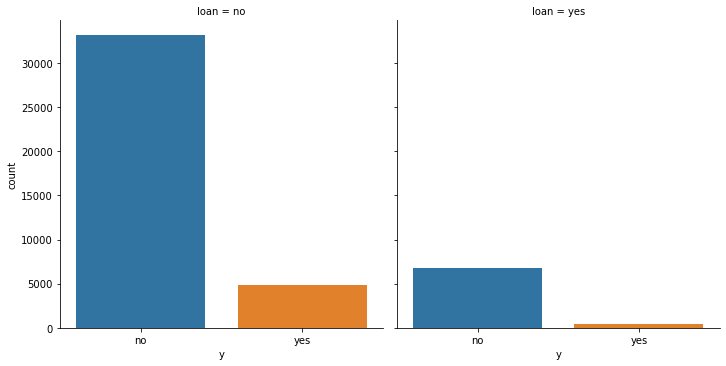

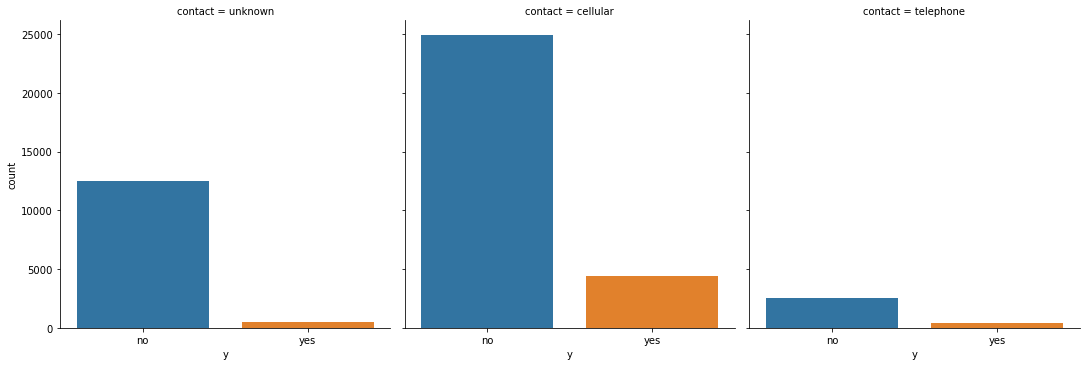

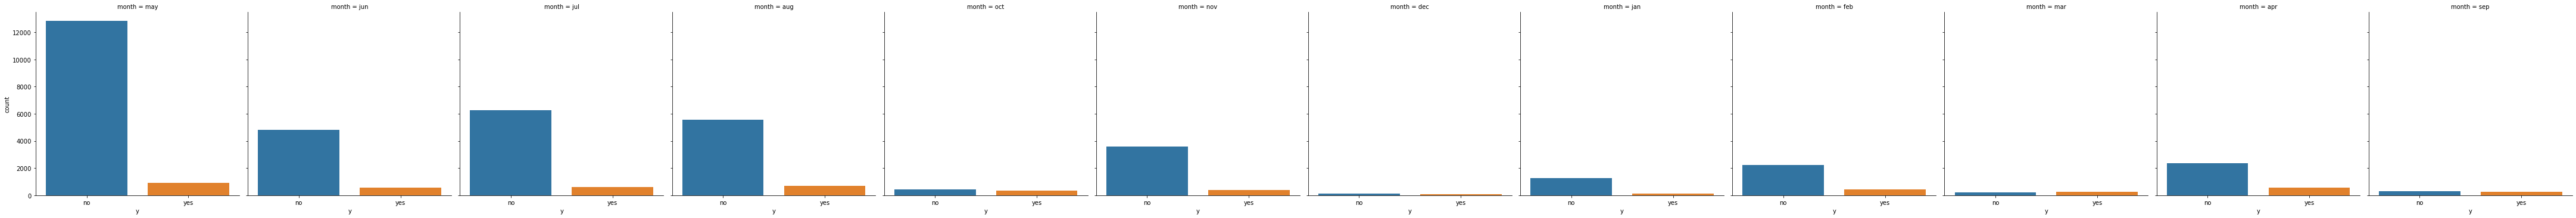

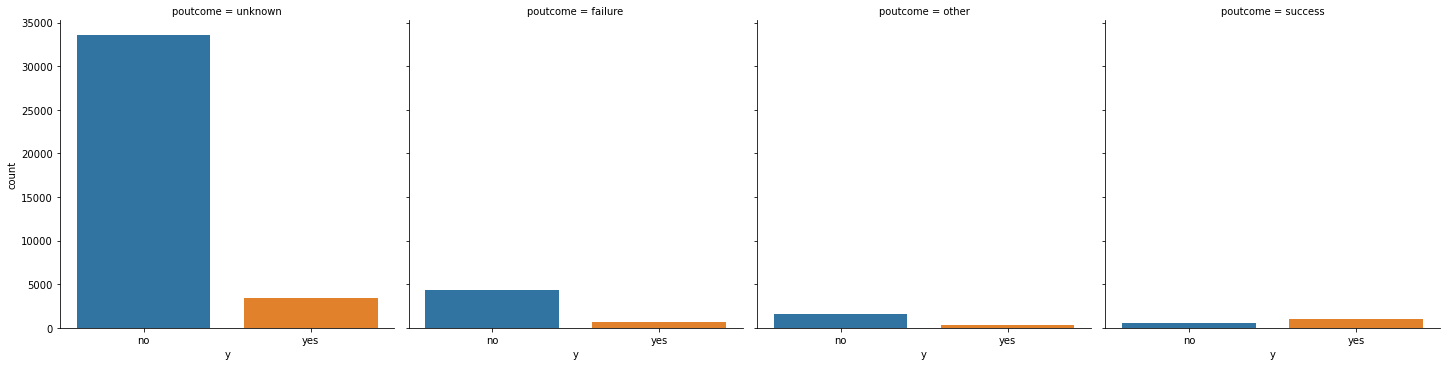

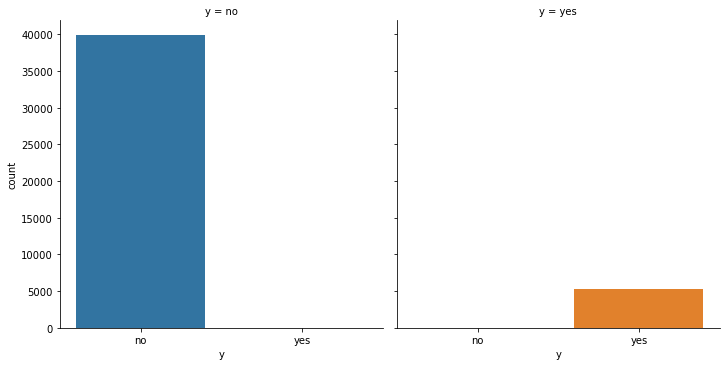

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [35]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

In [36]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print(len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


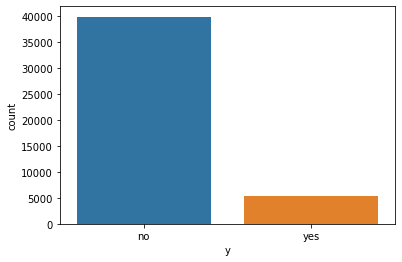

In [37]:
sns.countplot(x='y',data=df)
plt.show()

In [38]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [39]:
df2=df.copy()

In [40]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
df2.shape

(45211, 17)

In [42]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [43]:
df2.drop(['default'],axis=1, inplace=True)

In [44]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [45]:
df2.drop(['pdays'],axis=1, inplace=True)

In [46]:
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [47]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [49]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [50]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [51]:
df3 = df2[df2['campaign'] < 33]

In [52]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             

In [81]:
df3.groupby(['y','previous'],sort=True)['previous'].count()
df4 = df3[df3['previous'] < 31]
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
    
    bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [84]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [85]:
reg = linear_model.LogisticRegression()

In [87]:
reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred = reg.predict(X_test)

In [90]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

cm = np.zeros((len(y_test), len(y_pred)))
for x, y in zip(y_test, y_pred):
    cm[x][y] += 1

In [141]:
def create_conf_matrix(expected, predicted):
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, exp in zip(predicted, expected):
        m[pred][exp] += 1
    return m

In [142]:
matrix = confusionmatrix(y_pred, y_test)

In [143]:

    recall = matrix[0][0] / (matrix[0][0] + matrix[1][0])
    accuracy = (matrix[0][0] + matrix[1][1]) / len(y_train)
    precision = matrix[0][0] / (matrix[0][0] + matrix[0][1])

    print(recall)
    print(accuracy)
    print(precision)

1.0
0.2379317980513729
0.9516218310638769


In [158]:
def get_fp_tp(y, proba, threshold):
    """Возвращает количество долей ложно положительных и истинно положительных."""
    # Разносим по классам
    pred = pd.Series(np.where(proba>=threshold, 1, 0),
                 	dtype='category')
    pred.cat.set_categories([0,1], inplace=True)
    # Создаём матрицу ошибок
    confusion_matrix = pred.groupby([y, pred]).size().unstack()\
                           .rename(columns={0: 'pred_0',
                                         1: 'pred_1'},
                                   index={0: 'actual_0',
                                          1: 'actual_1'})
    false_positives = confusion_matrix.loc['actual_0', 'pred_1']
    true_positives = confusion_matrix.loc['actual_1', 'pred_1']
    return false_positives, true_positives

y_test = np.array([1 if p=="a" else 0 for p in y_test])
y_train = np.array([1 if p=="a" else 0 for p in y_train])
thresholds = np.linspace(0,1,100)


In [ ]:
# fpr и tpr
tpr = []
fpr = []
# определяем положительные и отрицательные
positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)

# перебираем пороговые значения и получаем количество ложных и истинных положительных результатов
for th in thresholds:
    fp,tp = get_fp_tp(y_test, y_pred, th)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
    
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve")
plt.ylabel("True Positive ")
plt.legend()

plt.show()